In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [550]:
cars_data = pd.read_csv('Car data.csv')

In [551]:
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [552]:
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [553]:
cars_data.shape

(301, 9)

In [554]:
#preprocessing

In [555]:
#NULL ChecK

In [556]:
cars_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [557]:
cars_data.dropna(inplace=True)

In [558]:
cars_data.shape

(301, 9)

In [559]:
#Duplicate Check

In [560]:
cars_data.duplicated().sum()

2

In [561]:
cars_data.drop_duplicates(inplace=True)

In [562]:
cars_data.shape

(299, 9)

In [563]:
cars_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [564]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [565]:
#Data Analysis

In [566]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of Car_Name
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenge

In [567]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [568]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [569]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [570]:
cars_data['Car_Name'] = cars_data['Car_Name'].apply(get_brand_name)

In [571]:
cars_data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [572]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of Car_Name
['ritz' 'sx4' 'ciaz' 'wagon' 'swift' 'vitara' 's' 'alto' 'ertiga' 'dzire'
 'ignis' '800' 'baleno' 'omni' 'fortuner' 'innova' 'corolla' 'etios'
 'camry' 'land' 'Royal' 'UM' 'KTM' 'Bajaj' 'Hyosung' 'Mahindra' 'Honda'
 'Yamaha' 'TVS' 'Hero' 'Activa' 'Suzuki' 'i20' 'grand' 'i10' 'eon' 'xcent'
 'elantra' 'creta' 'verna' 'city' 'brio' 'amaze' 'jazz']
Unique values of Year
[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
Unique values of Selling_Price
[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  6.85  7.5
  6.1   2.25  7.75  3.25  2.65  4.9   4.4   2.5   2.9   3.    4.15  6.
  1.95  3.1   2.35  4.95  5.5   2.95  4.65  0.35  5.85  2.55  1.25  1.05
  5.8  14.9  23.   18.   16.    2.75  3.6   4.5   4.1  19.99  6.95 18.75
 23.5  33.   19.75  4.35 14.25  3.95  1.5   5.25 14.5  14.73 12.5   3.49
 35.    5.9   3.45  3.8  11.25  3.51  4.   20.75 17.    7.05  9.65  1.75
  1.7   1.65  1.45  1.35  1.2   1.15  1.11  1.1   1.    

In [573]:
cars_data['Car_Name'].replace(
    ['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto', 'ertiga', 'dzire',
     'ignis', '800', 'baleno', 'omni', 'fortuner', 'innova','corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
     'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS', 'Hero', 'Activa', 
     'Suzuki','i20', 'grand', 'i10', 'eon', 'xcent', 'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 
     'jazz'],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 17, 18, 19, 20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30,31, 32, 33, 34, 35, 36, 37, 38, 39, 40,41,42,43,44],
    inplace=True)

In [574]:
cars_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [575]:
cars_data['Transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [576]:
cars_data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [577]:
cars_data['Selling_type'].replace(['Dealer', 'Individual'],[1,2], inplace=True)

In [578]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    int64  
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    int64  
 7   Transmission   299 non-null    int64  
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 23.4+ KB


In [579]:
cars_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [580]:
cars_data['Fuel_Type'].replace(['Petrol', 'Diesel', 'CNG'],[1,2,3], inplace=True)

In [581]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    int64  
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    int64  
 6   Selling_type   299 non-null    int64  
 7   Transmission   299 non-null    int64  
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 23.4 KB


In [582]:
cars_data.reset_index(inplace=True)

In [583]:
cars_data

,index,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,0,1,2014,3.35,5.59,27000,1,1,1,0
1,1,2,2013,4.75,9.54,43000,2,1,1,0
2,2,3,2017,7.25,9.85,6900,1,1,1,0
3,3,4,2011,2.85,4.15,5200,1,1,1,0
4,4,5,2014,4.60,6.87,42450,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
294,296,41,2016,9.50,11.60,33988,2,1,1,0
295,297,42,2015,4.00,5.90,60000,1,1,1,0
296,298,41,2009,3.35,11.00,87934,1,1,1,0
297,299,41,2017,11.50,12.50,9000,2,1,1,0


In [584]:
cars_data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [585]:
cars_data.drop(columns=['index'], inplace=True)

In [586]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
Car_Name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
------------
Year
[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
------------
Selling_Price
[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  6.85  7.5
  6.1   2.25  7.75  3.25  2.65  4.9   4.4   2.5   2.9   3.    4.15  6.
  1.95  3.1   2.35  4.95  5.5   2.95  4.65  0.35  5.85  2.55  1.25  1.05
  5.8  14.9  23.   18.   16.    2.75  3.6   4.5   4.1  19.99  6.95 18.75
 23.5  33.   19.75  4.35 14.25  3.95  1.5   5.25 14.5  14.73 12.5   3.49
 35.    5.9   3.45  3.8  11.25  3.51  4.   20.75 17.    7.05  9.65  1.75
  1.7   1.65  1.45  1.35  1.2   1.15  1.11  1.1   1.    0.95  0.9   0.75
  0.8   0.78  0.72  0.65  0.6   0.55  0.52  0.51  0.5   0.48  0.45  0.42
  0.4   0.38  0.31  0.3   0.27  0.25  0.2   0.18  0.17  0.16  0.15  0.12
  0.1   5.75  5.15  7.9   4.85 11.75  3.15  6.45  3.5   8.25 

In [587]:
cars_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [588]:
input_data = cars_data.drop(columns=['Selling_Price'])
output_data =cars_data['Selling_Price']

In [589]:
cars_data.drop(columns=['Present_Price'])


,Car_Name,Year,Selling_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1,2014,3.35,27000,1,1,1,0
1,2,2013,4.75,43000,2,1,1,0
2,3,2017,7.25,6900,1,1,1,0
3,4,2011,2.85,5200,1,1,1,0
4,5,2014,4.60,42450,2,1,1,0
...,...,...,...,...,...,...,...,...
294,41,2016,9.50,33988,2,1,1,0
295,42,2015,4.00,60000,1,1,1,0
296,41,2009,3.35,87934,1,1,1,0
297,41,2017,11.50,9000,2,1,1,0


In [590]:
input_data.head(5)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1,2014,5.59,27000,1,1,1,0
1,2,2013,9.54,43000,2,1,1,0
2,3,2017,9.85,6900,1,1,1,0
3,4,2011,4.15,5200,1,1,1,0
4,5,2014,6.87,42450,2,1,1,0


In [591]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

In [592]:
#model Creation

In [593]:
model = LinearRegression()

In [594]:
#Train MOdel

In [595]:
model.fit(x_train, y_train)

LinearRegression()

In [596]:
training_data=model.predict(x_train)

In [597]:
error_score=metrics.r2_score(y_train,training_data)
print("R squared Error :",error_score)

R squared Error : 0.877666667699621


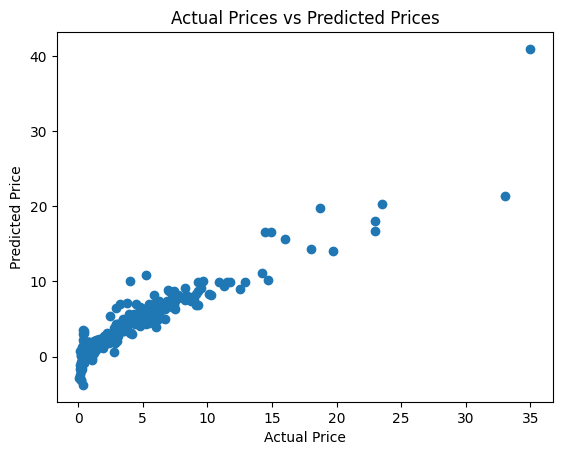

In [598]:
plt.scatter(y_train,training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [599]:
predict = model.predict(x_test)

In [600]:
predict

array([ 6.30485072,  2.52603295,  4.04318057, 10.0446831 ,  1.99039137,
        0.72730376,  9.69272602, 10.55207114,  1.5039351 , -0.99150904,
        7.54198719,  5.38132264,  4.51121062,  1.11322665,  7.91655492,
        0.10810135, -2.73800234, -0.49169953, -0.37969512,  3.72629423,
        6.85888296,  1.70453051,  6.53140566,  1.48342396,  5.20640441,
        1.47694439,  2.33261096,  7.17039952,  1.08476099,  1.05900062,
        4.54396292,  4.84074299,  6.86916114,  0.61164749, -0.06215108,
        5.14590028,  3.93042231,  2.47551063,  3.45869599,  6.21088762,
        1.49962196, -0.3597752 , -0.70782882,  4.11048392,  2.03698458,
        8.27626137,  1.5992103 , 16.24106565, -1.06363497,  9.19053929,
        5.21069768,  5.67726218,  5.85323895,  0.12102302,  4.57813833,
        6.21015019, -2.3238392 , 19.91708015,  1.82145728,  4.64965598])

In [601]:
x_train.head(1)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
52,15,2013,30.61,135000,2,2,2,0


In [602]:
input_data_model = pd.DataFrame(
    [[5,2022,5.60,12169,1,1,1,1]],
    columns=['Car_Name','Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner'])

In [603]:
input_data_model

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,5,2022,5.6,12169,1,1,1,1


In [604]:
model.predict(input_data_model)

array([5.75832697])

In [605]:
import pickle as pk

In [606]:
pk.dump(model,open('model.pkl','wb'))